In [13]:
import numpy as np
import pandas as pd


In [14]:
from scipy import stats
import scipy.integrate as sci

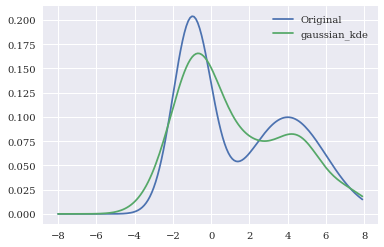

In [15]:
#가우시안 KDE
data_1=np.random.normal(loc=4.0, scale=2.0, size=100)
data_2=np.random.normal(loc=-1.0, scale=1.0, size=100)
data=np.concatenate([data_1, data_2], axis=0)

X=np.arange(-8, 8, 0.1)
Y_1=stats.norm.pdf(X, loc=4.0, scale=2.0)
Y_2=stats.norm.pdf(X, loc=-1.0, scale=1.0)
Y=0.5*(Y_1+Y_2)

estimator=stats.gaussian_kde(data, bw_method='silverman')
K=estimator(X)

plt.plot(X, Y, label='Original')
plt.plot(X, K, label='gaussian_kde')
plt.legend(loc='best')
plt.show()

In [16]:
def epanechnikov_kernel(u):
    return ((0.75/np.sqrt(5))*(1-((u**2)/5)))

x=np.linspace(-np.sqrt(5), np.sqrt(5))
y=epanechnikov_kernel(x)
a=-np.sqrt(5)
b=np.sqrt(5)

Inte_x=np.linspace(a,b)
Inte_y=epanechnikov_kernel(Inte_x)


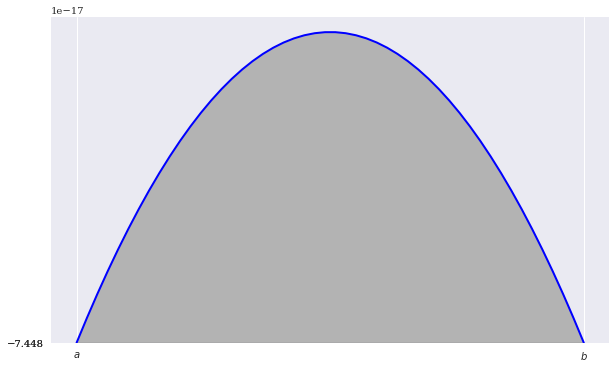

In [19]:
from matplotlib.patches import Polygon
from pylab import plt,mpl

plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,6))
plt.plot(x,y,'b', linewidth=2)
plt.ylim(bottom=0)

verts=[(a,0)]+list(zip(Inte_x, Inte_y))+[(b,0)]
poly=Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

ax.set_xticks((a,b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([epanechnikov_kernel(a), epanechnikov_kernel(b)])

In [25]:
import sympy as sy
a,b=sy.symbols('a b')
x=sy.symbols('x')
y=sy.symbols('y')
I=sy.Integral(sy.sin(x)+x, (x,a,b))
print(sy.pretty(I))

int_func=sy.integrate(epanechnikov_kernel(x), (x, -np.sqrt(5), np.sqrt(5)))
int_func

b                
⌠                
⎮ (x + sin(x)) dx
⌡                
a                


1.00000000000000

## KDE Bandwidth의 결정 
어떤 기준으로 최적의 bandwidth h를 결정하는가